In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [3]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Univariate

In [7]:
newdf=df.iloc[:,[4,5,13]]

In [8]:
newdf.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


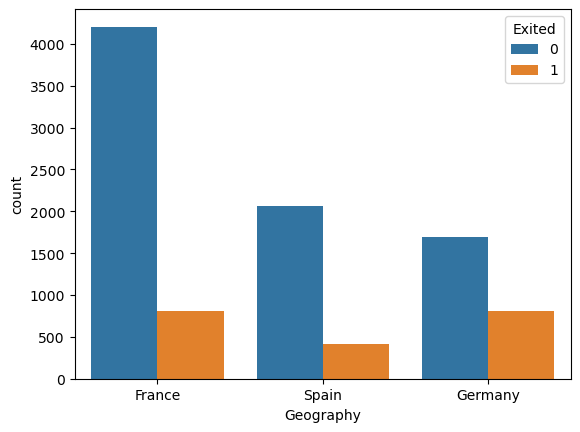

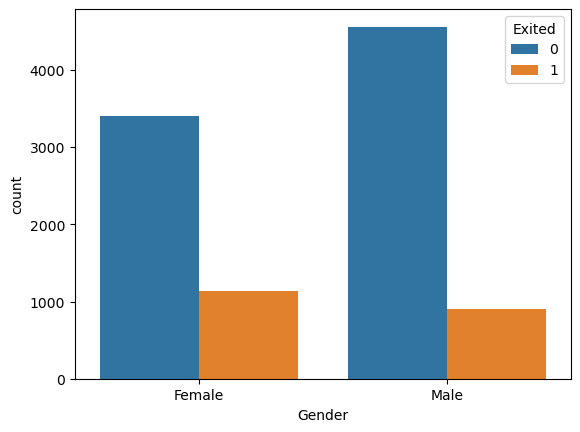

In [10]:
#count plot
for i,predictor in enumerate(newdf.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=newdf , x=predictor , hue= 'Exited')

In [11]:
newdf.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
newdf.Exited.value_counts()/len(newdf)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

# Bivariate

<Axes: xlabel='Gender', ylabel='Count'>

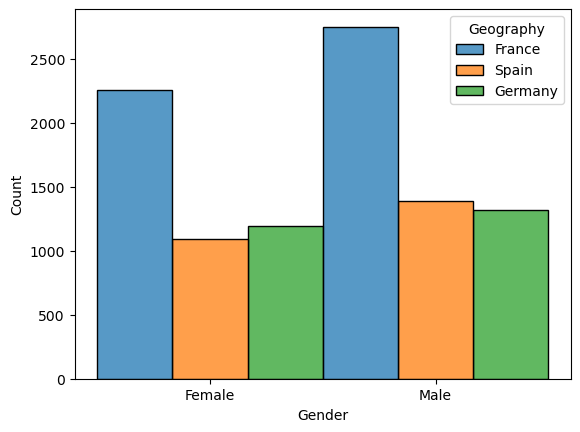

In [13]:
sns.histplot(x='Gender', hue= 'Geography',data=newdf ,stat='count' , multiple='dodge')

In [14]:
newdf_target1=newdf.loc[newdf['Exited']==1]

<Axes: xlabel='Gender', ylabel='Count'>

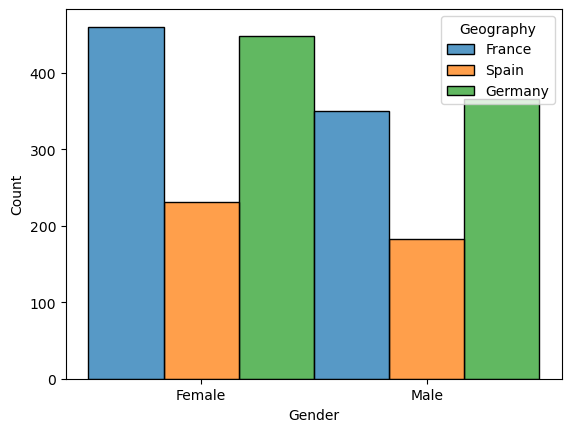

In [15]:
sns.histplot(x='Gender', hue= 'Geography',data=newdf_target1 ,stat='count' , multiple='dodge')

# Numerical Analysis

In [19]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_10576\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


C:\Users\HP\AppData\Local\Temp\ipykernel_10576\2624092674.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

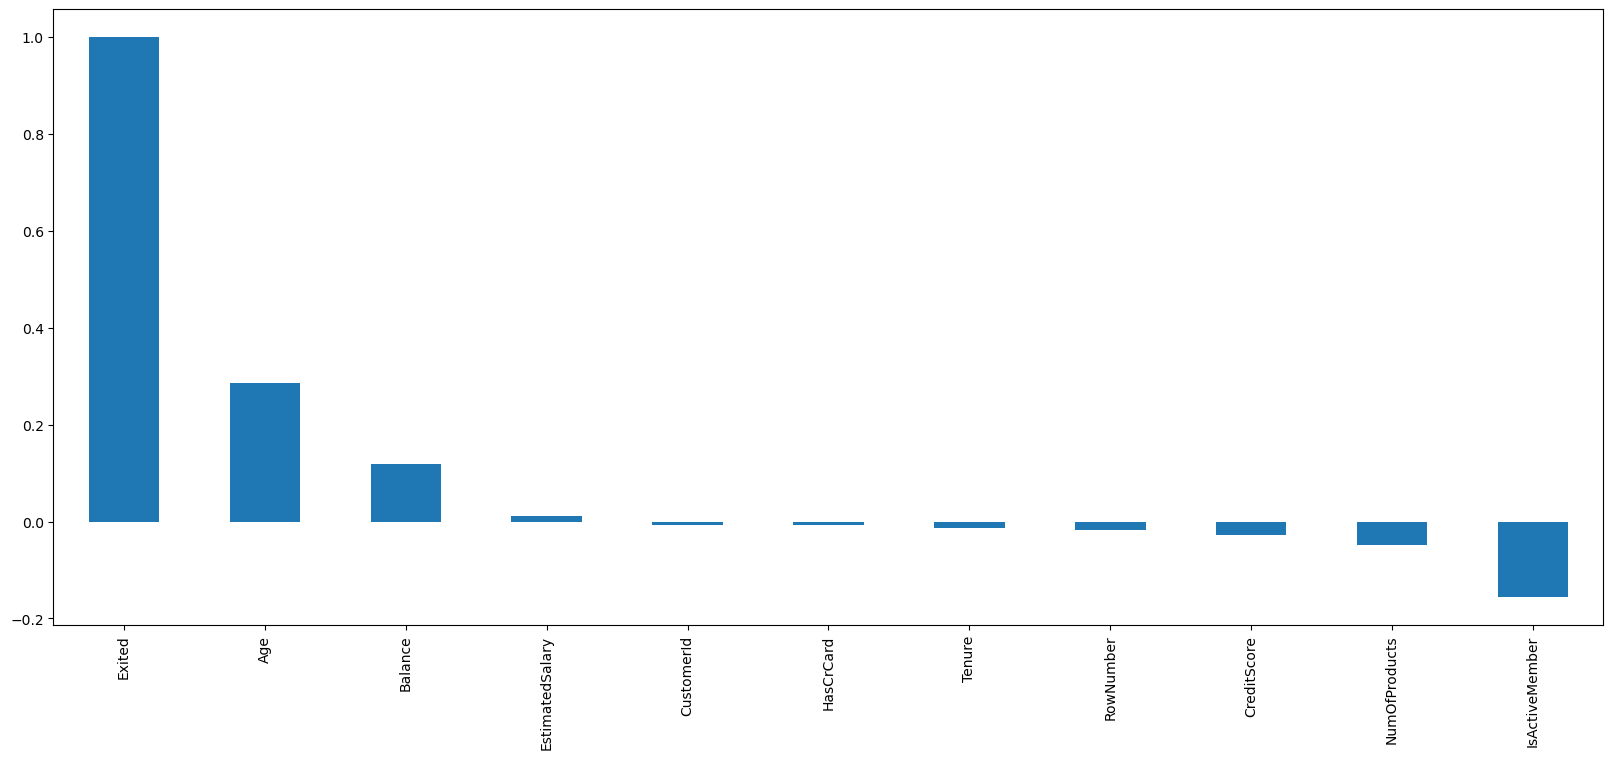

In [20]:
plt.figure(figsize=(20,8))
df.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

C:\Users\HP\AppData\Local\Temp\ipykernel_10576\1750433084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Paired')


<Axes: >

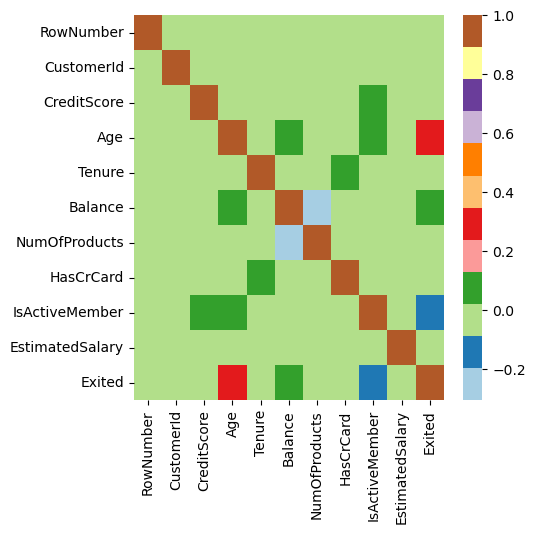

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cmap='Paired')

In [27]:
# (minecraft who)

<Axes: >

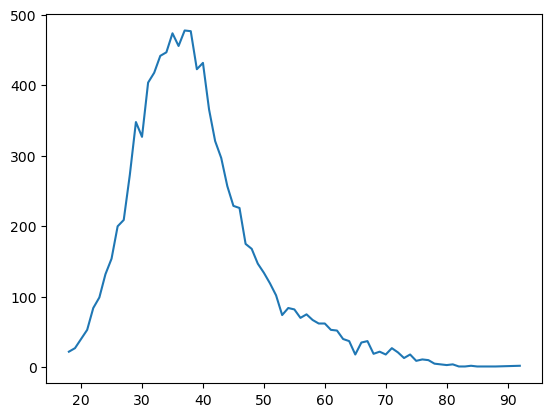

In [28]:
df['Age'].value_counts().sort_index(ascending=True).plot()

C:\Users\HP\AppData\Local\Temp\ipykernel_10576\1929116962.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Age[(df["Exited"]==0)],
C:\Users\HP\AppData\Local\Temp\ipykernel_10576\1929116962.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.Age[(df["Exited"]==1)],


Text(0.5, 1.0, 'Age by churn')

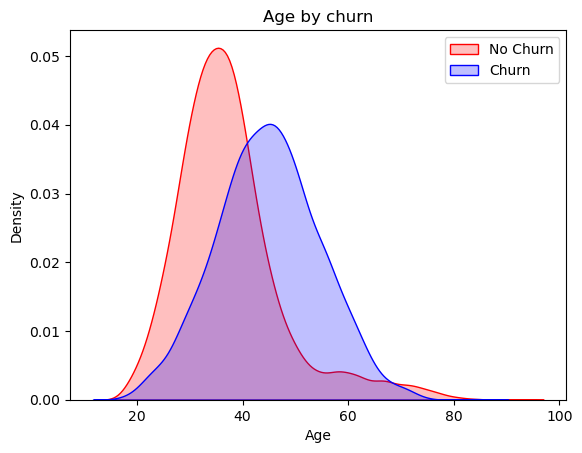

In [30]:
Tot = sns.kdeplot(df.Age[(df["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(df.Age[(df["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')

In [33]:
df.duplicated().sum()

0